In [1]:
library(ggplot2)
library(lattice)
library(caret)
# 정규화시키기 위해 사용되는 라이브러리
library(NbClust)
# 적적한 클러스터 개수를 찾기 위해 사용되는 라이브러리
library(cluster)

In [2]:
##정규화
#데이터가 균일하게 분포되어있는 경우에는 [0, 1] 범위로 값을 조정하는 것이 도움이 될 수 있다. 
#데이터의 최대값을 1로 두고 최소값을 0으로 할 때, 각 데이터의 상대적인 위치를 값으로 한다.
#K-means 군집 분석은 관측치 간의 거리를 이용하기 때문에 변수의 단위가 결과에 큰 영향을 미친다.
#그래서 변수를 표준화 하는 작업이 필요함.
#https://lumiamitie.github.io/r/preProcess/  참고

In [3]:
##NbClust
#K-means 군집분석에서는 입력하는 변수와 함께 중심의 갯수를 지정하는 것이 중요.

In [4]:
data = read.csv("lottery.csv", sep=",")
#데이터 로드

In [5]:
str(data)

'data.frame':	716 obs. of  9 variables:
 $ round : int  716 715 714 713 712 711 710 709 708 707 ...
 $ date  : Factor w/ 716 levels "2002.12.07","2002.12.14",..: 716 715 714 713 712 711 710 709 708 707 ...
 $ first : int  2 2 1 2 17 11 3 10 2 2 ...
 $ second: int  6 7 7 5 20 15 4 18 10 12 ...
 $ third : int  13 27 22 15 30 24 9 30 16 19 ...
 $ fourth: int  16 33 33 18 31 35 24 36 19 24 ...
 $ fifth : int  29 41 37 19 33 37 25 39 34 39 ...
 $ sixth : int  30 44 40 23 45 45 33 44 45 44 ...
 $ bonus : int  21 10 20 44 19 42 10 32 1 35 ...


In [6]:
summary(data)

     round               date         first            second     
 Min.   :  1.0   2002.12.07:  1   Min.   : 1.000   Min.   : 2.00  
 1st Qu.:179.8   2002.12.14:  1   1st Qu.: 2.000   1st Qu.: 8.00  
 Median :358.5   2002.12.21:  1   Median : 5.000   Median :12.00  
 Mean   :358.5   2002.12.28:  1   Mean   : 6.584   Mean   :12.92  
 3rd Qu.:537.2   2003.01.04:  1   3rd Qu.: 9.250   3rd Qu.:17.00  
 Max.   :716.0   2003.01.11:  1   Max.   :35.000   Max.   :37.00  
                 (Other)   :710                                   
     third           fourth          fifth           sixth      
 Min.   : 3.00   Min.   : 5.00   Min.   : 9.00   Min.   :19.00  
 1st Qu.:14.00   1st Qu.:21.00   1st Qu.:28.00   1st Qu.:37.00  
 Median :20.00   Median :27.00   Median :34.00   Median :41.00  
 Mean   :19.82   Mean   :26.15   Mean   :32.74   Mean   :39.43  
 3rd Qu.:25.00   3rd Qu.:32.00   3rd Qu.:38.00   3rd Qu.:44.00  
 Max.   :39.00   Max.   :43.00   Max.   :44.00   Max.   :45.00  
         

In [7]:
data.new<-data[,c(3:9)]
#데이터 3열부터 9까지 추출하여 data.new 생성

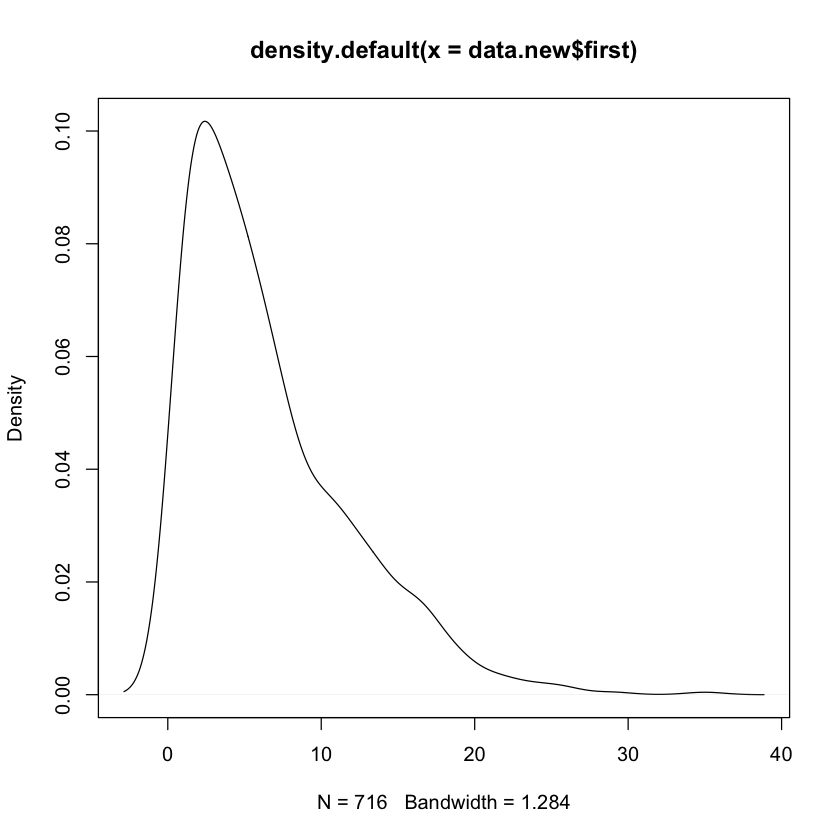

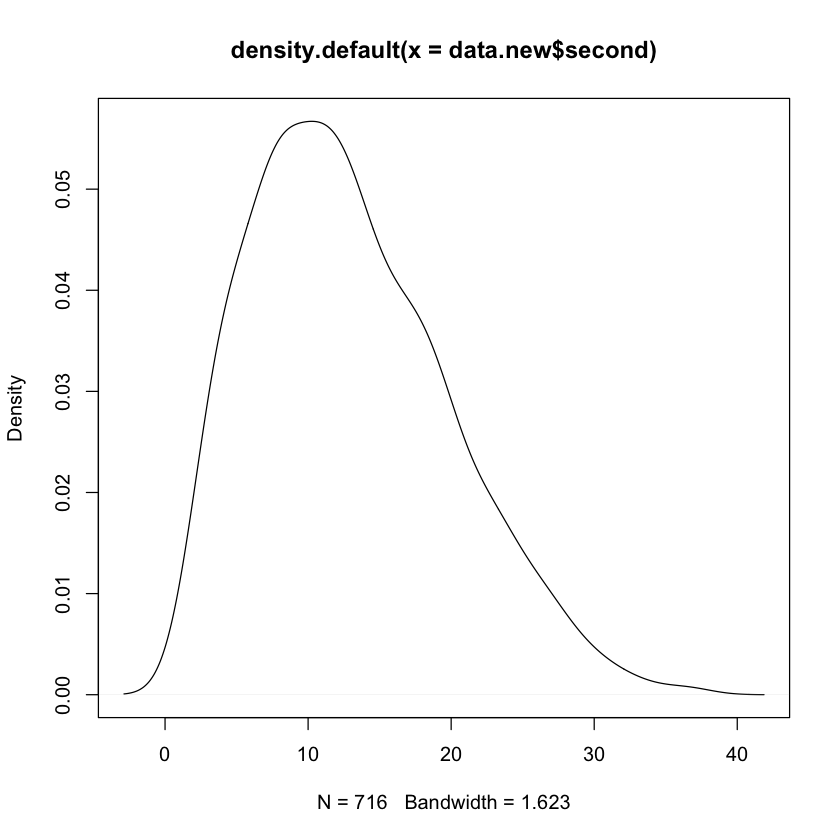

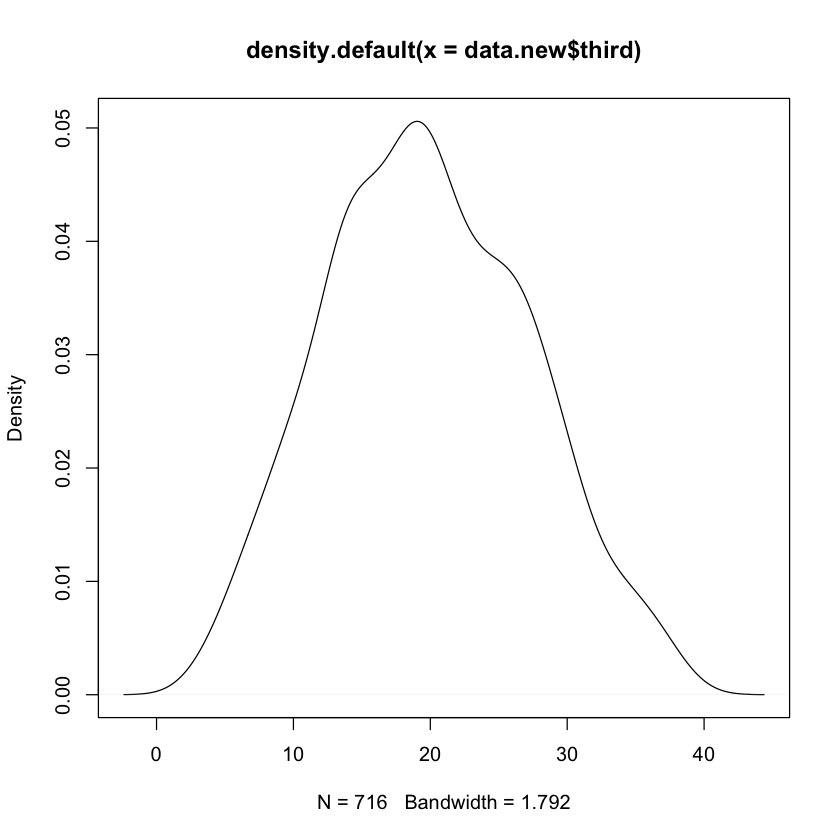

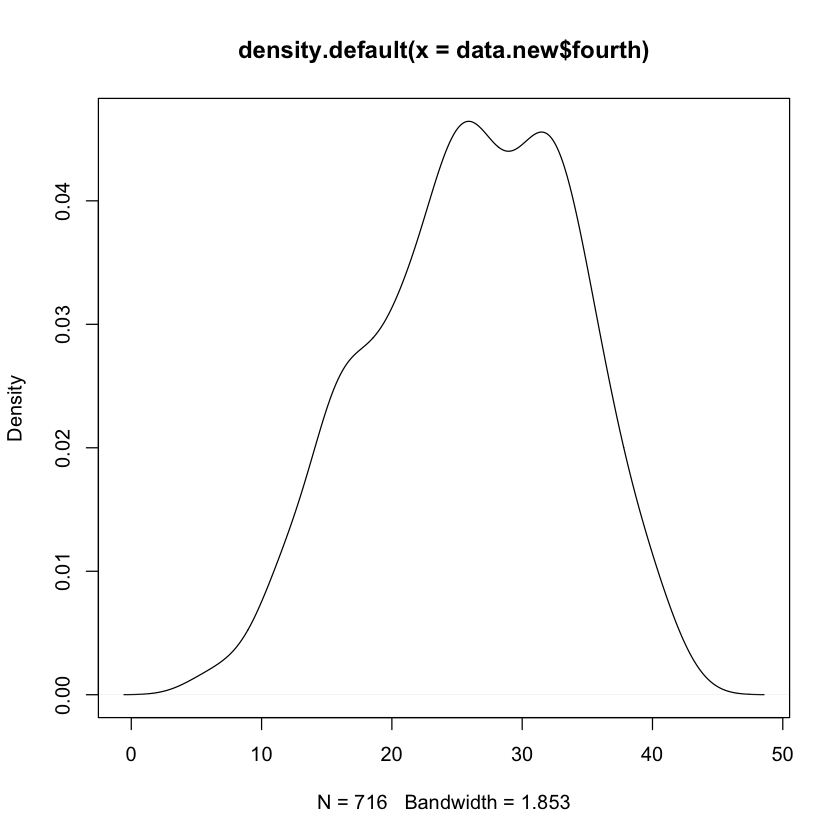

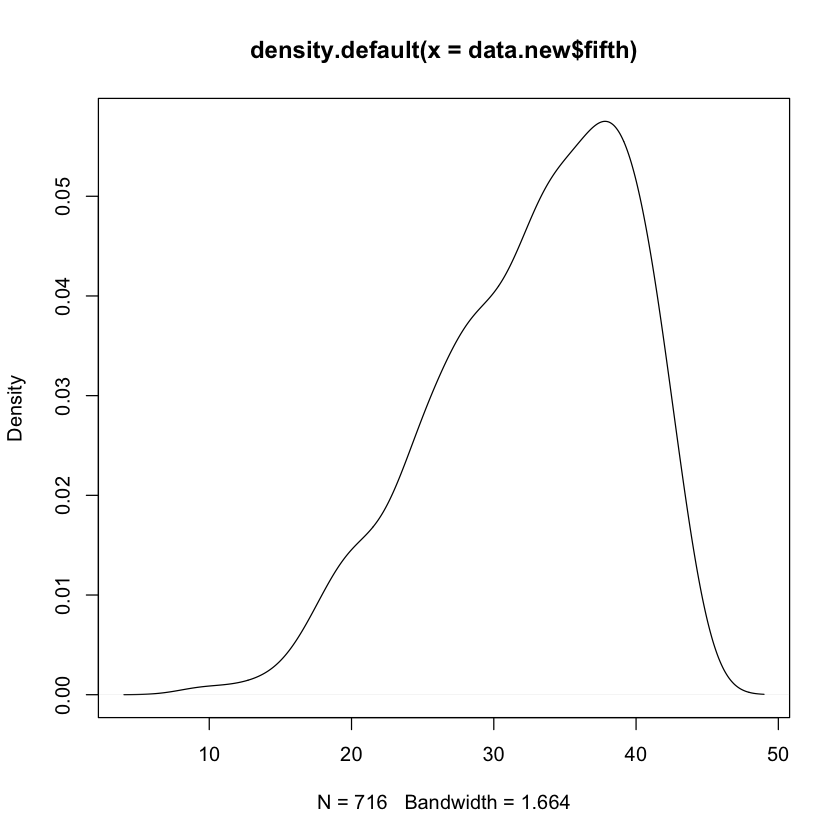

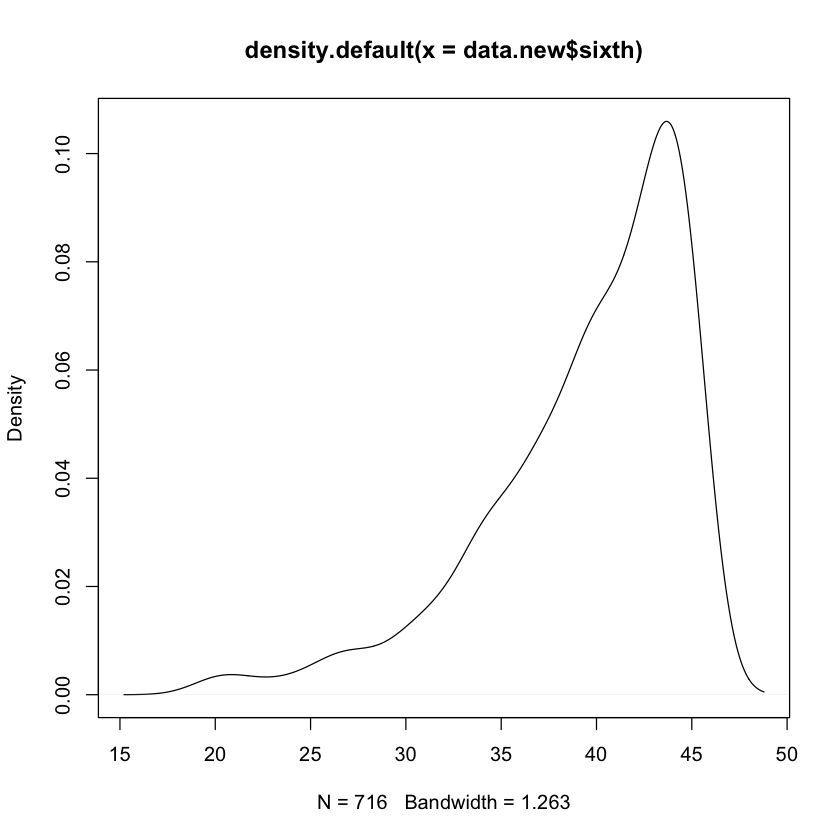

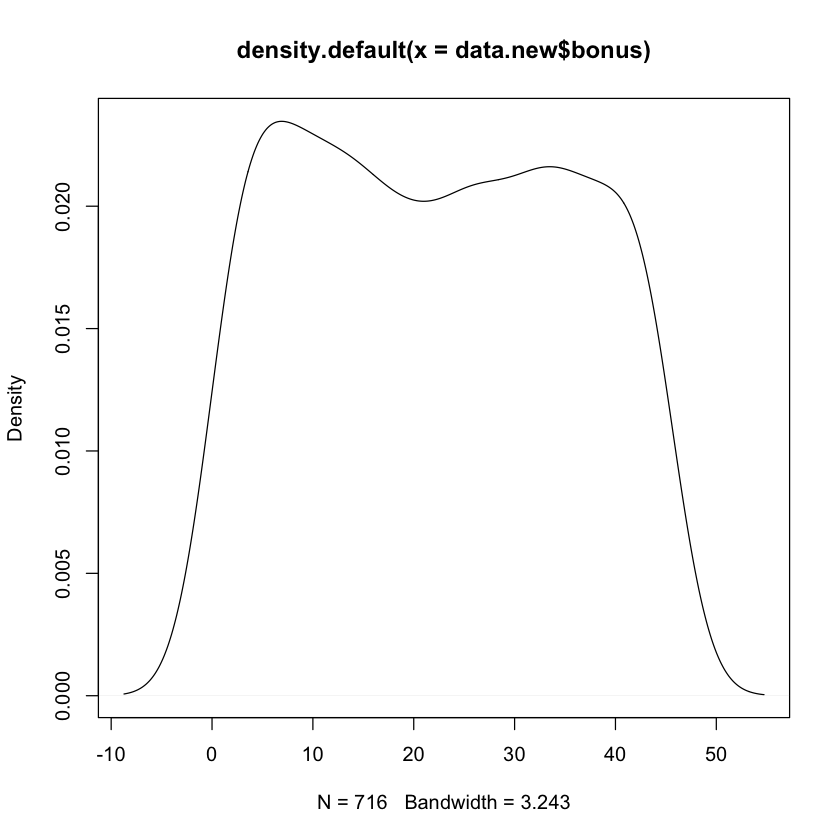

In [8]:
plot(density(data.new$first))
plot(density(data.new$second))
plot(density(data.new$third))
plot(density(data.new$fourth))
plot(density(data.new$fifth))
plot(density(data.new$sixth))
plot(density(data.new$bonus))
#기존 데이터의 열별로 분포도 확인

In [9]:
summary(data.new)

     first            second          third           fourth     
 Min.   : 1.000   Min.   : 2.00   Min.   : 3.00   Min.   : 5.00  
 1st Qu.: 2.000   1st Qu.: 8.00   1st Qu.:14.00   1st Qu.:21.00  
 Median : 5.000   Median :12.00   Median :20.00   Median :27.00  
 Mean   : 6.584   Mean   :12.92   Mean   :19.82   Mean   :26.15  
 3rd Qu.: 9.250   3rd Qu.:17.00   3rd Qu.:25.00   3rd Qu.:32.00  
 Max.   :35.000   Max.   :37.00   Max.   :39.00   Max.   :43.00  
     fifth           sixth           bonus      
 Min.   : 9.00   Min.   :19.00   Min.   : 1.00  
 1st Qu.:28.00   1st Qu.:37.00   1st Qu.:10.00  
 Median :34.00   Median :41.00   Median :22.00  
 Mean   :32.74   Mean   :39.43   Mean   :22.28  
 3rd Qu.:38.00   3rd Qu.:44.00   3rd Qu.:34.00  
 Max.   :44.00   Max.   :45.00   Max.   :45.00  

In [10]:
preprocessParams<-preProcess(data.new, method=c("range"))
#method = "range"는 데이터를 [0, 1] 사이의 값으로 조정한다

In [11]:
data.new<-predict(preprocessParams, data.new)

In [12]:
summary(data.new)

     first             second           third            fourth      
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.02941   1st Qu.:0.1714   1st Qu.:0.3056   1st Qu.:0.4211  
 Median :0.11765   Median :0.2857   Median :0.4722   Median :0.5789  
 Mean   :0.16423   Mean   :0.3120   Mean   :0.4673   Mean   :0.5566  
 3rd Qu.:0.24265   3rd Qu.:0.4286   3rd Qu.:0.6111   3rd Qu.:0.7105  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     fifth            sixth            bonus       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5429   1st Qu.:0.6923   1st Qu.:0.2045  
 Median :0.7143   Median :0.8462   Median :0.4773  
 Mean   :0.6784   Mean   :0.7858   Mean   :0.4837  
 3rd Qu.:0.8286   3rd Qu.:0.9615   3rd Qu.:0.7500  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

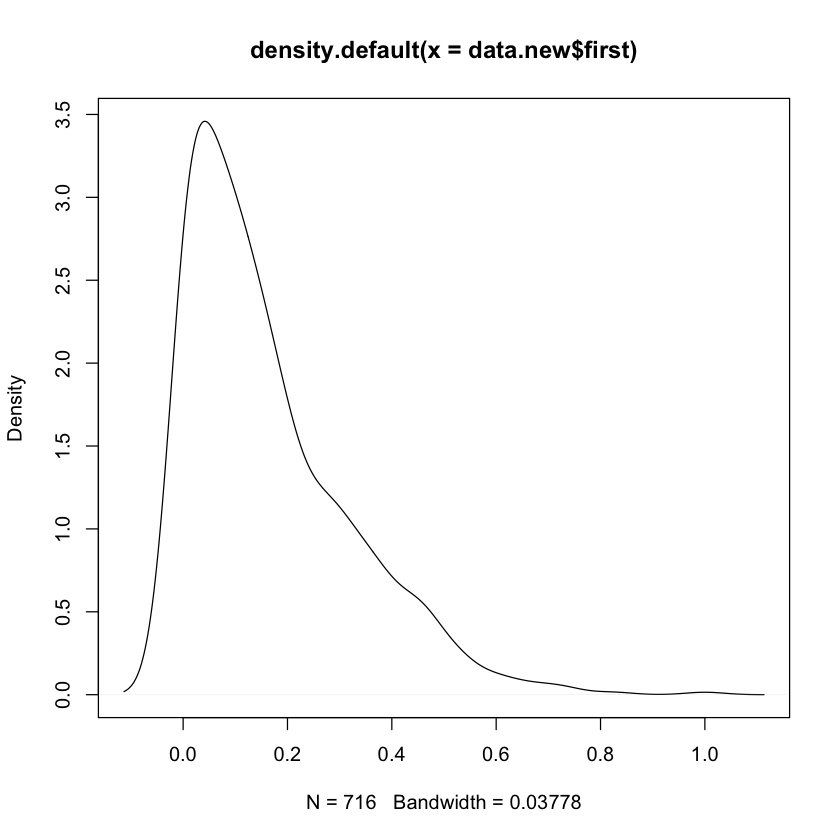

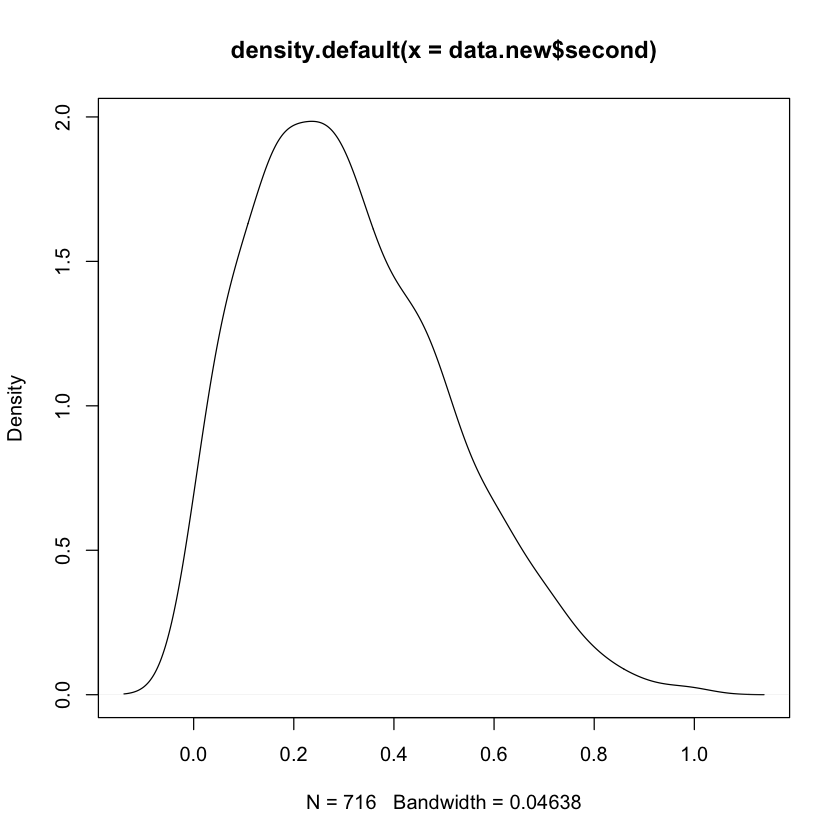

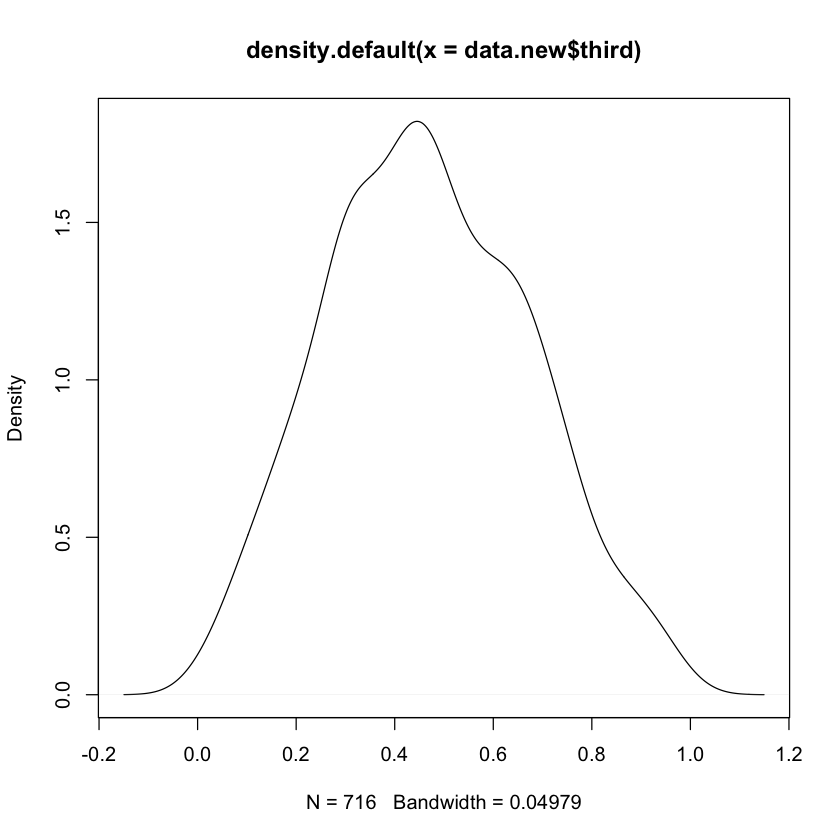

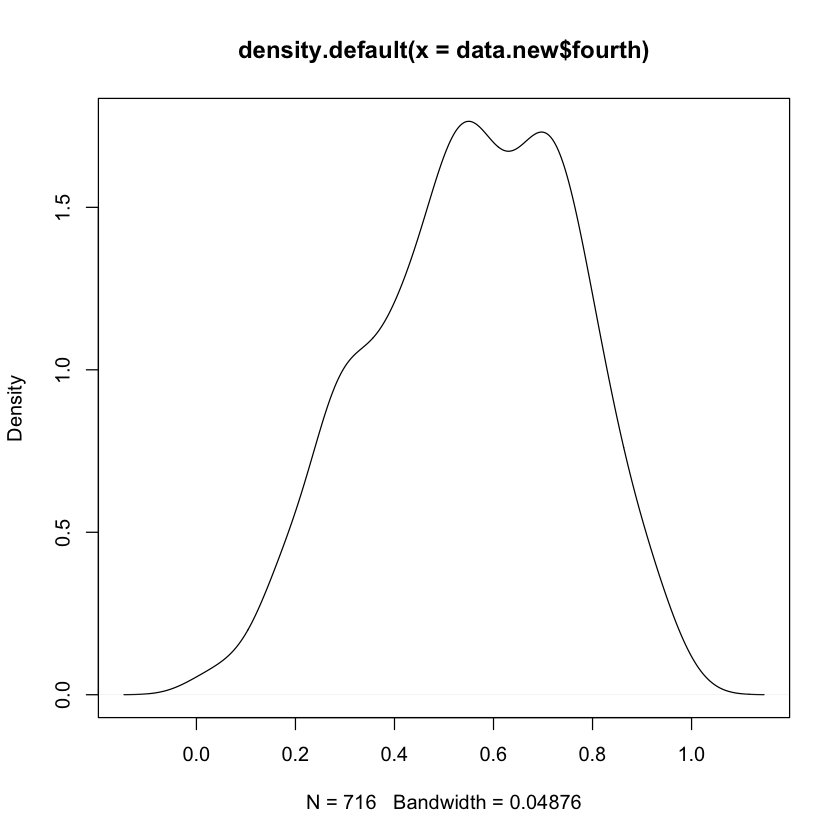

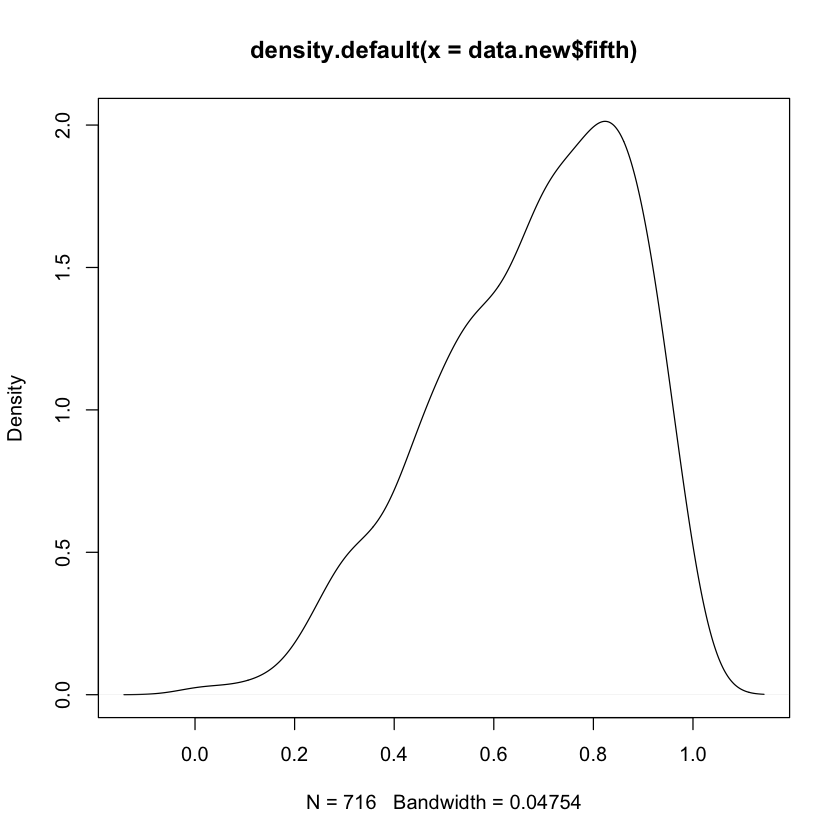

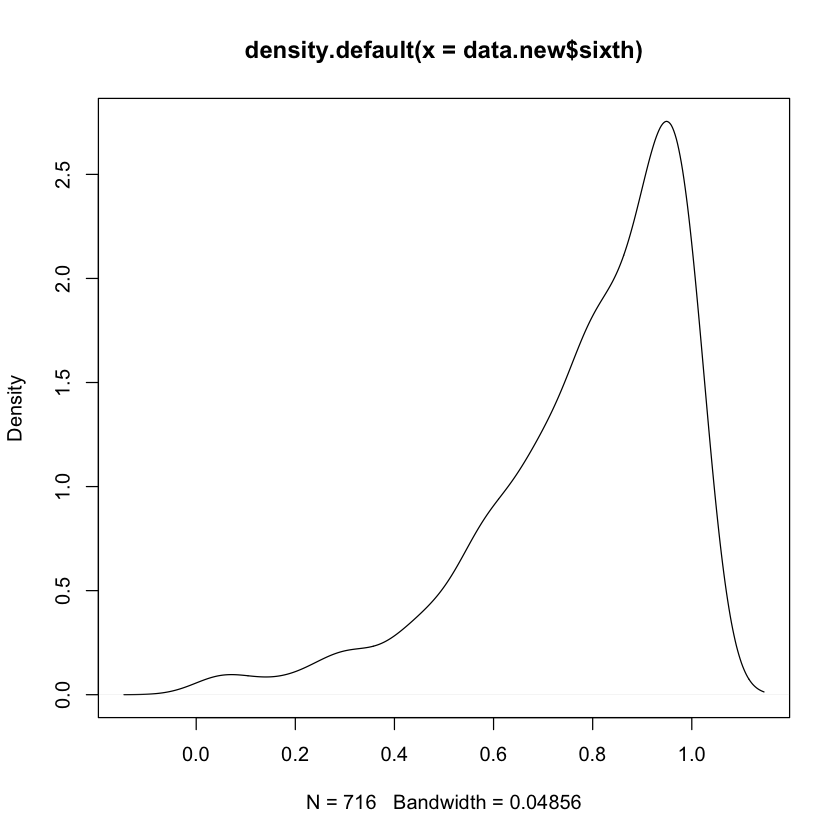

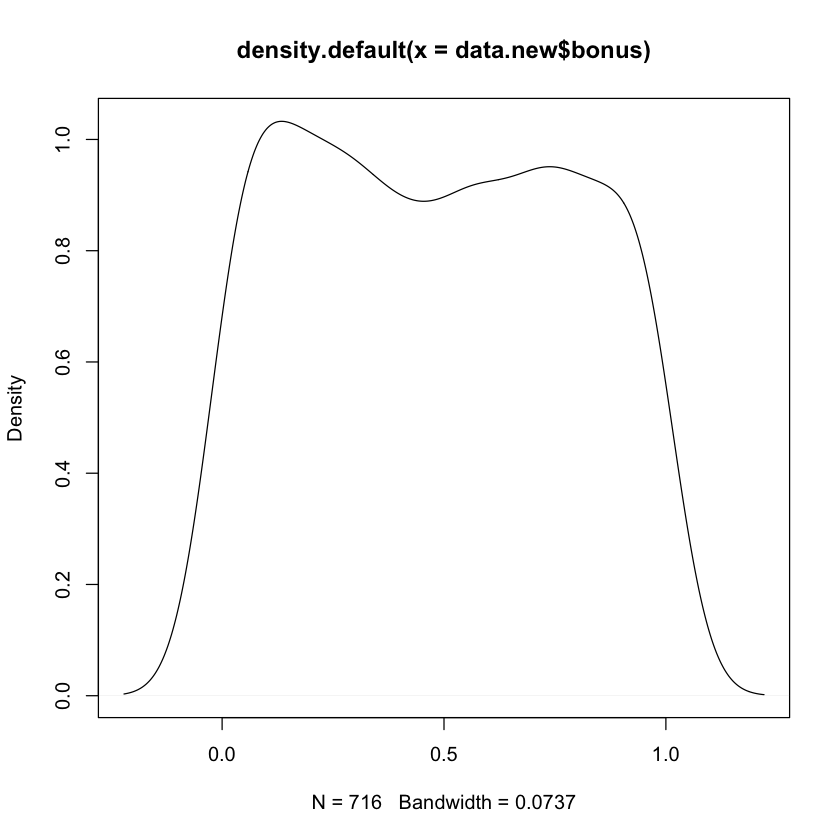

In [13]:
plot(density(data.new$first))
plot(density(data.new$second))
plot(density(data.new$third))
plot(density(data.new$fourth))
plot(density(data.new$fifth))
plot(density(data.new$sixth))
plot(density(data.new$bonus))
#정규화 과정을 거친 후 데이터의 열별로 분포도 확인
#확인결과 그래프는 똑같으나 범위가 [0,1]로 정해진 것을 알 수 있음

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


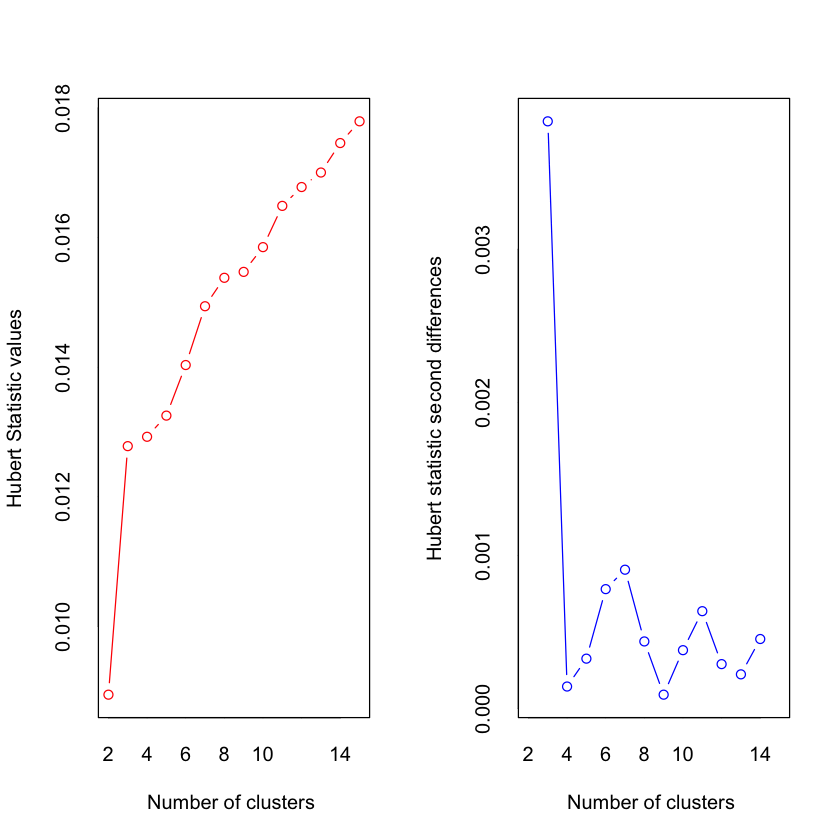

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 7 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


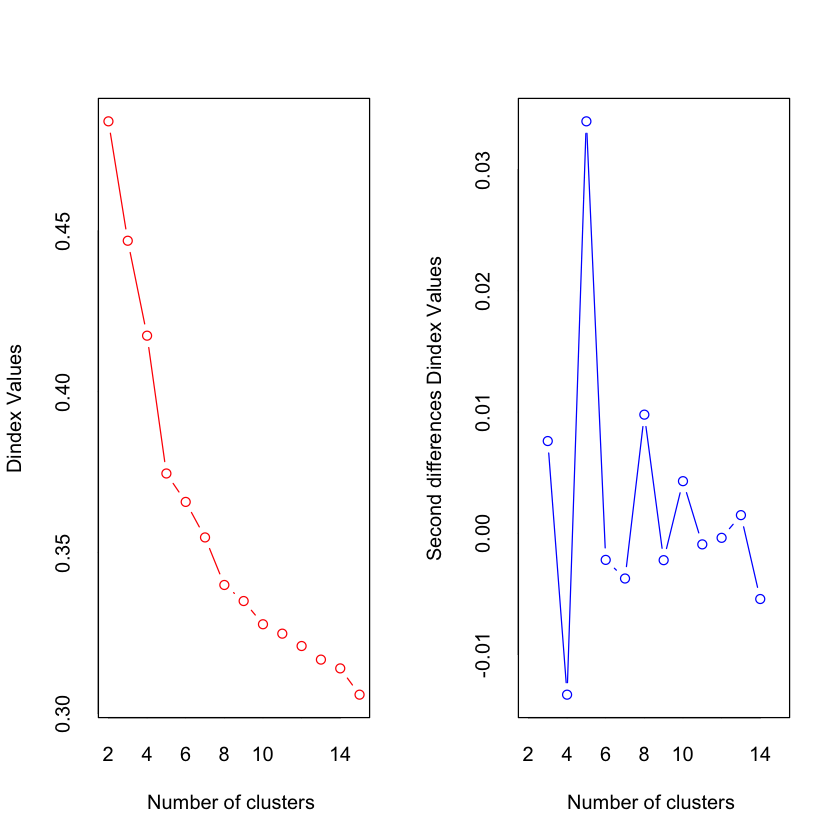

In [14]:
cluster.num<-NbClust(data.new, method="complete")
#적절한 군집화 개수 측정
#method=complete
#https://rpubs.com/cardiomoon/249084 참고

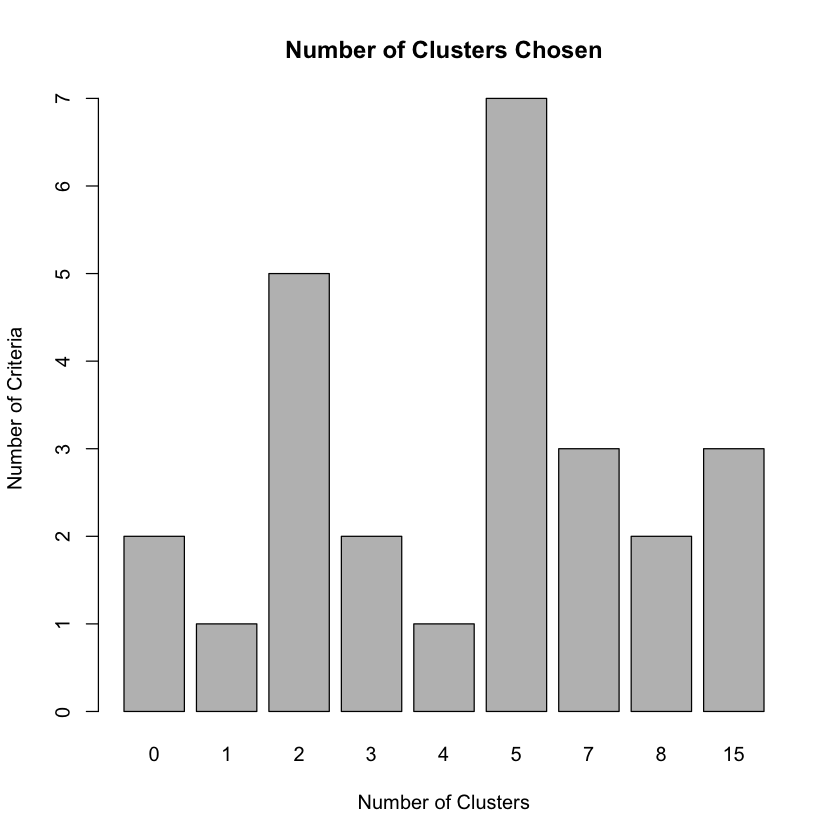

In [15]:
barplot(table(cluster.num$Best.n[1,]),xlab="Number of Clusters",ylab="Number of Criteria",
        main="Number of Clusters Chosen")
#군집 갯수별 criteria 개수
#5개의 군집이 적절하다는 것을 알 수 있음

In [16]:
cluster.num

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,⋯,Ratkowsky,Ball,Ptbiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
2,0.0192,157.4346,142.0144,30.2535,2692.771,1139904392,835.8357,186.8316,125.3111,8.7479,⋯,0.3120,93.4158,0.2956,0.0177,0.2900,0.0665,0.0089,10.4469,0.4840,1.2185
3,1.3601,165.1497,101.6646,21.3373,3139.654,1374013955,771.9318,155.8359,133.7868,10.4879,⋯,0.3410,51.9453,0.4410,1.3137,0.5988,0.0832,0.0128,11.2143,0.4469,1.1606
4,0.3686,159.4629,172.7223,18.2519,3626.519,1237534289,735.4259,136.3886,142.4432,11.9833,⋯,0.3298,34.0972,0.3854,0.1361,1.5899,0.0893,0.0129,12.5891,0.4174,1.0619
5,71.9369,191.5211,39.7497,21.2526,4075.932,1032245494,334.5581,109.7618,146.2311,14.8903,⋯,0.3208,21.9524,0.4321,0.0088,2.3854,0.0952,0.0133,10.0387,0.3746,0.5703
6,0.0929,169.4940,50.8980,19.1194,4230.702,1197481263,299.3063,103.9503,147.8858,15.7228,⋯,0.2985,17.3250,0.4388,-0.0007,2.4302,0.0965,0.0140,9.4642,0.3658,0.4947
7,0.5078,159.6283,66.5353,18.2977,4423.578,1245007926,235.6423,96.9968,151.3875,16.8499,⋯,0.2812,13.8567,0.4467,0.3652,2.4752,0.1053,0.0149,8.6665,0.3547,0.4371
8,34.5908,158.9449,23.1132,18.7432,4749.247,1031856061,188.1009,88.6752,156.7571,18.4312,⋯,0.2694,11.0844,0.4346,0.9318,3.0033,0.1140,0.0154,9.1852,0.3400,0.4043
9,0.0956,146.2993,33.4350,17.4590,4870.315,1102782495,170.2395,85.8719,161.1663,19.0329,⋯,0.2572,9.5413,0.4147,0.1633,3.4358,0.1141,0.0155,11.6023,0.3350,0.3962
10,1.6612,139.7109,12.4681,17.5039,5063.011,1040216638,150.4886,81.9942,170.7164,19.9330,⋯,0.2480,8.1994,0.4148,0.8269,3.5390,0.1164,0.0159,11.0975,0.3277,0.3718
11,8.4711,129.0242,16.9215,16.3529,5160.003,1099202464,145.7609,80.5713,176.1978,20.2850,⋯,0.2378,7.3247,0.3787,0.3517,4.5342,0.1182,0.0165,15.7771,0.3248,0.3717


In [17]:
kc<-kmeans(data.new, centers=5, nstart=20)
#nbclust를 바탕으로 5개로 군집화 하여 20번을 실행해 본 후 가장 잘나온 결과를 output

In [18]:
kc

K-means clustering with 5 clusters of sizes 180, 78, 149, 175, 134

Cluster means:
       first    second     third    fourth     fifth     sixth     bonus
1 0.12500000 0.2460317 0.4197531 0.5345029 0.6766667 0.8209402 0.2118687
2 0.06636501 0.1329670 0.2183048 0.2749663 0.3494505 0.4186391 0.4102564
3 0.21081721 0.4149569 0.5961969 0.6979866 0.8103547 0.8939081 0.7464918
4 0.10201681 0.2058776 0.3382540 0.4248120 0.5841633 0.7400000 0.7584416
5 0.30333626 0.5289979 0.7014925 0.7651218 0.8486141 0.8917910 0.2406716

Clustering vector:
  [1] 2 1 1 2 5 3 2 3 1 3 2 4 4 5 2 4 5 2 1 4 4 5 1 4 4 5 3 3 1 4 1 1 4 1 5 5 4
 [38] 4 4 3 3 1 2 1 3 4 3 1 1 5 2 1 5 1 2 4 1 3 3 3 4 5 5 1 3 1 4 5 5 4 3 4 1 5
 [75] 3 5 4 4 1 3 2 4 2 1 5 2 1 5 1 1 5 2 1 3 4 2 3 1 5 2 1 4 5 4 4 5 4 1 4 5 2
[112] 2 4 3 1 3 4 4 3 3 1 5 1 4 4 1 5 3 4 5 2 1 3 3 3 4 4 4 1 3 1 1 1 1 1 3 4 1
[149] 4 4 4 3 1 2 2 1 4 3 3 3 3 1 5 4 3 4 4 5 1 4 1 5 1 5 3 3 1 3 1 5 1 4 3 4 1
[186] 4 5 3 5 3 4 5 5 5 1 1 5 1 5 1 3 2 1 1 2 4 3 5 3 5 2 3

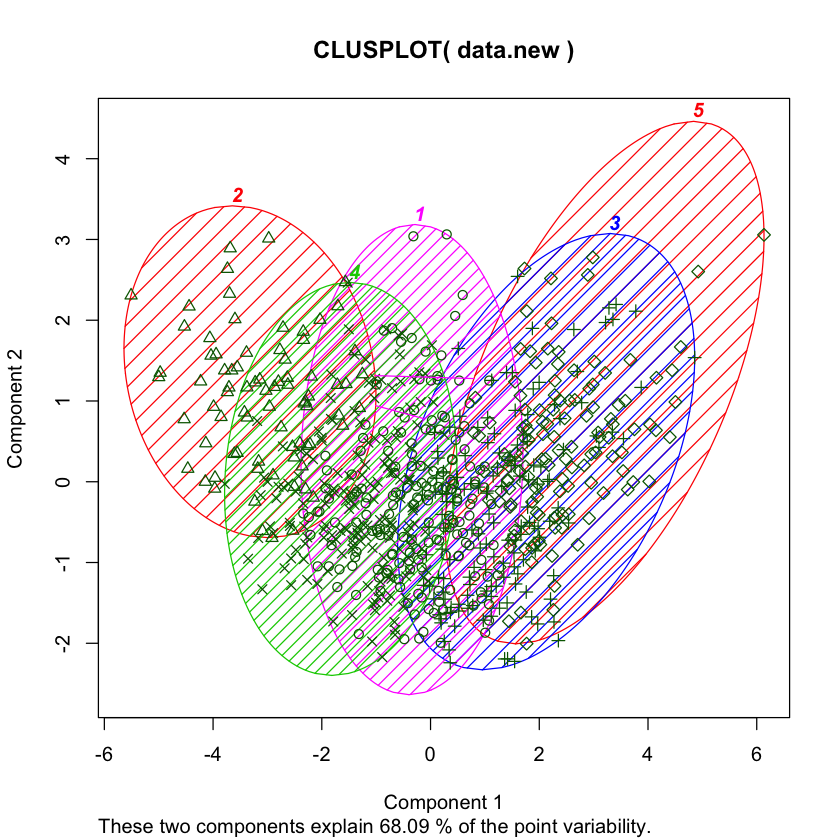

In [19]:
clusplot(data.new, kc$cluster, color=TRUE, shade=TRUE, labels=5)
#분포 그래프 출력

In [20]:
dst<-as.matrix(dist(data.new))
#거리 구하기

In [21]:
sobj<-silhouette(kc$cluster, dmatrix=dst)
#실루엣 분석을 통한 만들어진 모델 평가하기
#실루엣 분석은 군집화된 거리들이 밀집이 잘 되어있는지를 판단하여 군집화가 잘 되었는지를 알려줌

In [22]:
summary(sobj)
#각 군집의 avg가 1에 가까울수록 군집화가 잘되었다는 것이고 -1에 가까울수록 군집화가 안되었다는 것임

Silhouette of 716 units in 5 clusters from silhouette.default(x = kc$cluster, dmatrix = dst) :
 Cluster sizes and average silhouette widths:
      180        78       149       175       134 
0.2238959 0.1536944 0.1861172 0.2273436 0.2330366 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.07366  0.11278  0.21275  0.21094  0.30589  0.46907 

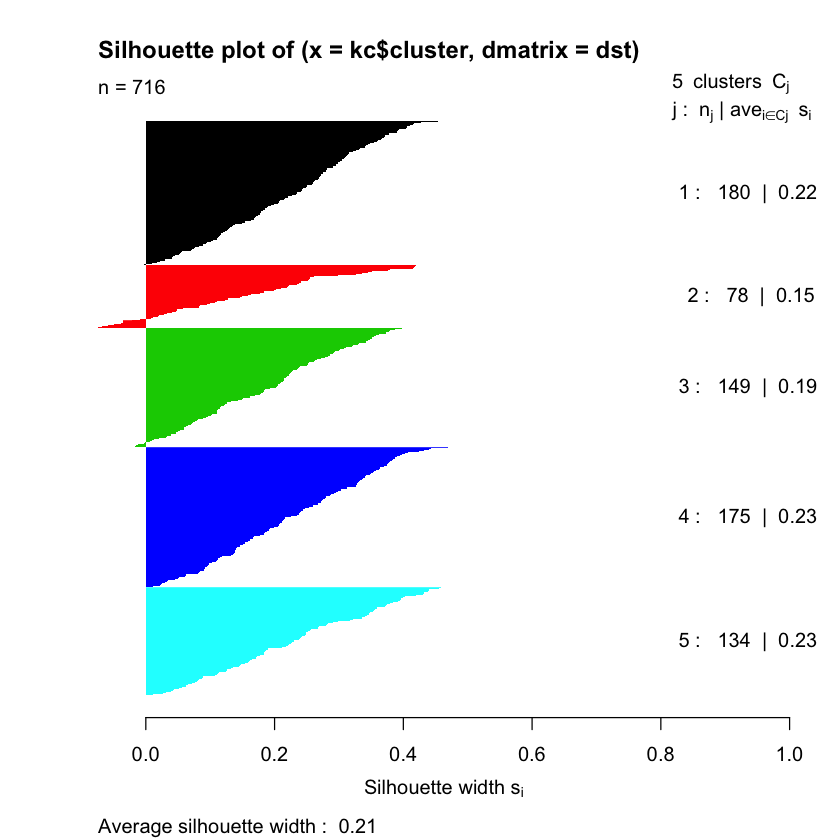

In [23]:
plot(sobj, col=1:5)
#군집화 평균 시각화